In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
rain_data = pd.read_csv('data/weatherAUS.csv')
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
rain_data.select_dtypes(exclude=['object']).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
#1 - THE MOST MINIMUM TEMPERATURE

In [5]:
min_temp_data = rain_data[['Location', 'MinTemp']]
min_temp_data = min_temp_data.groupby(by='Location').min()
min_temp_data = min_temp_data["MinTemp"].sort_values(ascending=False)

min_temp_data.head()

Location
Darwin           12.5
NorfolkIsland     9.4
Cairns            9.2
Townsville        6.4
Wollongong        5.4
Name: MinTemp, dtype: float64

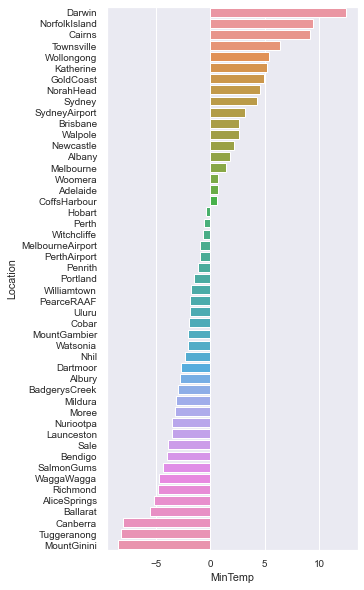

In [6]:
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 10))
colors_cw = sns.color_palette('coolwarm', len(min_temp_data))

sns.barplot(x=min_temp_data, y=min_temp_data.index)

In [7]:
#2 - THE MOST MAXIUMUM TEMPERATURE
max_temp_data = rain_data[['Location', 'MaxTemp']]
max_temp_data = max_temp_data.groupby(by='Location').max()
max_temp_data.max()


MaxTemp    48.1
dtype: float64

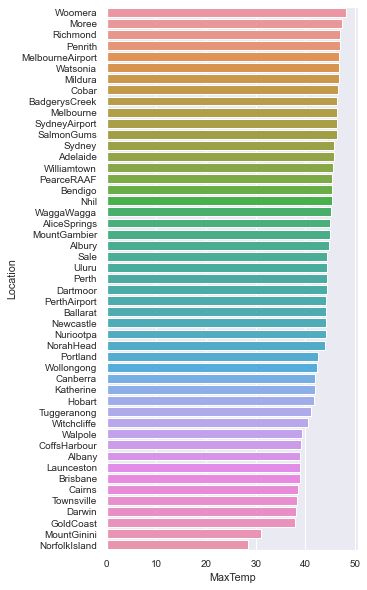

In [8]:
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 10))
max_temp_data = max_temp_data['MaxTemp'].sort_values(ascending=False)
colors_cw = sns.color_palette('coolwarm', len(max_temp_data))

sns.barplot(x=max_temp_data, y=max_temp_data.index)

In [9]:
#3 - LARGEST AMOUNT OF RAINFALL
rainfall_data = rain_data[['Location', 'Rainfall']]
rainfall_data_max =  rainfall_data.groupby(by='Location').max()
rainfall_data_max = rainfall_data_max['Rainfall'].sort_values(ascending=False)
rainfall_data_max.max()

371.0

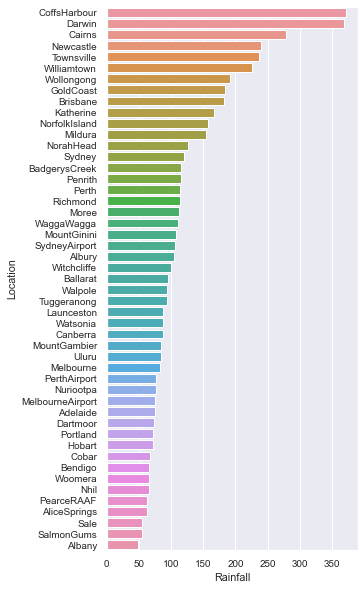

In [10]:
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 10))
colors_cw = sns.color_palette('coolwarm', len(rainfall_data_max))
sns.barplot(x=rainfall_data_max, y=rainfall_data_max.index)

In [11]:
#4 - PREDICTING NEXT DAY RAIN

In [12]:
rain_data[['Evaporation', 'Sunshine', 'RainToday', 'RainTomorrow']].corr()

,Evaporation,Sunshine
Evaporation,1.000000,0.365602
Sunshine,0.365602,1.000000


In [13]:
rain_data.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
RainToday         3261
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [14]:
rain_data.select_dtypes(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


In [15]:
 numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']


In [16]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [17]:
rain_data.dropna(subset=['RainTomorrow'], inplace=True)

In [18]:
rain_data.dropna(subset=['RainToday'], inplace=True)

In [19]:
rain_data['RainTomorrow'].isnull().sum()

0

In [20]:
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
rain_data[numerical_cols] = imputer.fit_transform(rain_data[numerical_cols])


In [21]:
rain_data[categorical_cols] = rain_data[categorical_cols].fillna('None')

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [23]:
rain_data['RainToday'].isnull().sum()

0

In [24]:
y = rain_data['RainTomorrow']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [25]:
X['RainToday'] = label_encoder.fit_transform(X['RainToday'])

NameError: name 'X' is not defined

In [58]:
with open('X.pkl', 'rb') as f:
    X = pkl.load(f)
with open('y.pkl', 'rb') as g:
    y = pkl.load(g)

In [28]:
X_old = X
y_old = y

In [22]:
X = rain_data.drop('RainTomorrow', axis=1)

In [23]:
X.drop('Date', axis=1, inplace=True)

In [29]:
import pickle as pkl
with open('X.pkl', 'wb') as x:
    pkl.dump(X, x)
with open('y.pkl', 'wb') as Y:
    pkl.dump(y, Y)

In [60]:
c_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [1,7, 9, 10])], remainder='passthrough')


In [39]:
X['Location'] = LabelEncoder().fit_transform(X['Location'])

X['WindGustDir'] = LabelEncoder().fit_transform(X['WindGustDir'])
X['WindDir9am'] = LabelEncoder().fit_transform(X['WindDir9am'])
X['WindDir3pm'] = LabelEncoder().fit_transform(X['WindDir3pm'])

1

In [40]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,5.472516,7.63054,14,44.0,14,15,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0
1,2,7.4,25.1,0.0,5.472516,7.63054,15,44.0,6,16,...,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0
2,2,12.9,25.7,0.0,5.472516,7.63054,16,46.0,14,16,...,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0
3,2,9.2,28.0,0.0,5.472516,7.63054,4,24.0,10,0,...,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0
4,2,17.5,32.3,1.0,5.472516,7.63054,14,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,5.472516,7.63054,0,31.0,2,0,...,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0
145455,41,2.8,23.4,0.0,5.472516,7.63054,0,31.0,10,1,...,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0
145456,41,3.6,25.3,0.0,5.472516,7.63054,6,22.0,10,3,...,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0
145457,41,5.4,26.9,0.0,5.472516,7.63054,3,37.0,10,15,...,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0


In [62]:
X = np.array(c_transformer.fit_transform(X))


In [51]:
print(x_one_encoded)

[[ 0.   0.   0.  ... 16.9 21.8  0. ]
 [ 0.   0.   0.  ... 17.2 24.3  0. ]
 [ 0.   0.   0.  ... 21.  23.2  0. ]
 ...
 [ 0.   0.   0.  ... 10.9 24.5  0. ]
 [ 0.   0.   0.  ... 12.5 26.1  0. ]
 [ 0.   0.   0.  ... 15.1 26.   0. ]]


In [56]:
rain_data.isnull().sum()


Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
dtype: int64

In [63]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [66]:
std_scaler = StandardScaler()
X_train[:, 519:535:] = std_scaler.fit_transform(X_train[:, 519:535])
X_test[:, 519:535] = std_scaler.transform(X_test[:, 519:535])

In [130]:
X_train.shape

(112629, 122)

In [67]:
import pickle as pkl


In [68]:
with open('X_train.pkl', 'wb') as f:
    pkl.dump(X_train, f)

In [69]:
with open('X_test.pkl', 'wb') as x_t:
    pkl.dump(X_test, x_t)

with open('y_train.pkl', 'wb') as y_tr:
    pkl.dump(y_train, y_tr)

with open('y_test.pkl', 'wb') as y_t:
    pkl.dump(y_test, y_t)

In [6]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2, 3), params))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [77]:
#Logistic Regression
logistic_regression = LogisticRegression()
parameters = {
    'C':[0.001,0.01,0.1,1,10,100, 1000]
}

cv = GridSearchCV(logistic_regression, parameters, cv=5)
cv.fit(X_train, y_train)


C:\Users\Dani\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dani\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

In [83]:
cv.best_estimator_

LogisticRegression(C=100)

In [5]:
import joblib


In [87]:
#Multilayer Perceptron
from sklearn.neural_network import MLPRegressor, MLPClassifier
mlp_classifier = MLPClassifier()
parameters = {
    'hidden_layer_sizes':[(10,),(50,),(100,)],
    'activation':['relu', 'tanh', 'logistic'],
    'learning_rate':['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp_classifier, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}

0.844 (+/-0.005) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.846 (+/-0.005) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.846 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.81 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.812 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.812 (+/-0.006) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.799 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.801 (+/-0.006) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.799 (+/-0.006) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lea

In [88]:
joblib.dump(cv.best_estimator_, 'mlp_model.pkl')

['mlp_model.pkl']

In [89]:
cv.best_estimator_

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,),
              learning_rate='adaptive')

In [91]:
#Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rf_classifier = RandomForestClassifier()
parameters = {
    'max_depth':[5, 20, 250],
    'n_estimators':[2, 4, 8, 16, 32]
}

cv = GridSearchCV(rf_classifier, parameters, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 20, 250],
                         'n_estimators': [2, 4, 8, 16, 32]})

In [2]:
print_results(cv)

NameError: name 'print_results' is not defined

In [97]:

joblib.dump(cv.best_estimator_, 'rf_model.pkl')

['rf_model.pkl']

In [98]:
#XGBoost

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb_classifier = GradientBoostingClassifier(n_estimators=500, max_depth=3,learning_rate=0.01)
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [6]:
joblib.dump(gb_classifier, 'gb.pkl')

['gb.pkl']

In [26]:
import pickle as pkl

with open('X_train.pkl', 'rb') as f:
    X_train = pkl.load(f)
with open('y_train.pkl', 'rb') as g:
    y_train = pkl.load(g)

In [27]:
with open('X_test.pkl', 'rb') as f:
    X_test = pkl.load(f)
with open('y_test.pkl', 'rb') as g:
    y_test = pkl.load(g)

In [28]:
#Evaluation and Selection of a Model
import time

In [39]:
def evaluate_model(name, model, features, labels):
    start = time.time()
    pred = model.predict(features)
    end = time.time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    latency = round(end - start, 3)
    print('{} -- Accuracy:{} / Precision:{} / Recall:{} / Latency:{}ms'.format(name, accuracy, precision, recall, latency))



In [40]:
#COnfusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

models = ['lr_model.pkl', 'gb.pkl', 'mlp_model.pkl', 'rf_model.pkl']
for model in models:
    with open(model, 'rb') as f:
        m = joblib.load(f)
        
        evaluate_model(model, m, X_test, y_test)
        


lr_model.pkl -- Accuracy:0.844 / Precision:0.721 / Recall:0.491 / Latency:0.052ms
gb.pkl -- Accuracy:0.844 / Precision:0.75 / Recall:0.45 / Latency:0.67ms
mlp_model.pkl -- Accuracy:0.846 / Precision:0.698 / Recall:0.544 / Latency:0.064ms
rf_model.pkl -- Accuracy:0.849 / Precision:0.769 / Recall:0.456 / Latency:0.535ms


In [34]:
import joblib
with open('rf_model.pkl', 'rb') as f:
    rf_model = joblib.load(f)
    y_scores = rf_model.decision_function(X_test)
    y_scores

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [ ]:
from sklearn.linear_model import sgd